In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
aqi=pd.read_csv("aqi.csv")
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [3]:
aqi['date'] = pd.to_datetime(aqi['date'], format="%d-%m-%Y", errors='coerce')

In [5]:
aqi['date'] = pd.to_datetime(aqi['date'], errors='coerce')
aqi['year'] = aqi['date'].dt.year
aqi['month'] = aqi['date'].dt.month

In [7]:
tier1 = ['Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Kolkata', 'Hyderabad', 'Pune', 'Ahmedabad']
tier2 = ['Nagpur', 'Indore', 'Surat', 'Lucknow', 'Bhopal', 'Coimbatore', 'Jaipur', 'Kanpur']

aqi_df = aqi[aqi['area'].isin(tier1 + tier2)]


In [12]:
yearly_aqi = aqi_df.groupby(['area', 'year'])['aqi_value'].mean().reset_index()
yearly_aqi

,area,year,aqi_value
0,Ahmedabad,2022,109.228782
1,Ahmedabad,2023,110.128767
2,Ahmedabad,2024,114.445355
3,Ahmedabad,2025,131.588235
4,Bhopal,2022,124.221805
5,Bhopal,2023,117.112637
6,Bhopal,2024,113.726027
7,Bhopal,2025,126.991597
8,Chennai,2022,70.865455
9,Chennai,2023,78.082645


In [9]:
from sklearn.linear_model import LinearRegression

def get_slope(city_df):
    X = city_df['year'].values.reshape(-1, 1)
    y = city_df['aqi_value'].values
    if len(np.unique(X)) > 1:
        model = LinearRegression().fit(X, y)
        return model.coef_[0]  
    return None

trend_data = []

for city in yearly_aqi['area'].unique():
    city_df = yearly_aqi[yearly_aqi['area'] == city]
    slope = get_slope(city_df)
    if slope is not None:
        trend_data.append({'city': city, 'slope': slope})

trend_df = pd.DataFrame(trend_data)


In [10]:
degrading_cities = trend_df[trend_df['slope'] > 5]

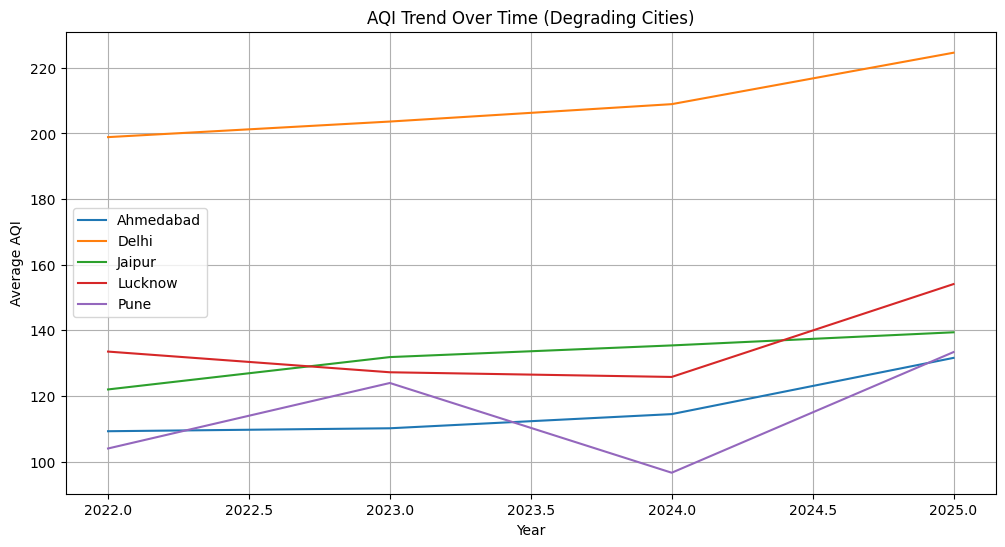

In [11]:
plt.figure(figsize=(12, 6))
for city in degrading_cities['city']:
    sns.lineplot(data=yearly_aqi[yearly_aqi['area'] == city], x='year', y='aqi_value', label=city)

plt.title("AQI Trend Over Time (Degrading Cities)")
plt.xlabel("Year")
plt.ylabel("Average AQI")
plt.legend()
plt.grid(True)
plt.show()